# 4.1. (mandatory) Perform motifs analysis to investigate the presence of 3-node configurations in the networks: determine their frequency and statistical significance (motifs, anti-motifs).

In [18]:
# mfinder1.2 D:\DataScience\BI\HW03\4-Go_pdc.txt
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pyedflib
import re

def motif_analysis(filename):
    file = open(filename, 'r')
    f = ''
    for row  in file: f += row

    colnames = ['ID', 'Frequency', 'Statistical Significance']
    d = {cn: [] for cn in colnames}
    intervals = []

    l = f.split('Full list of subgraphs size')[1].split('\n')
    for row in l:
        if '+-' in row:
            d[colnames[0]] += [int(row.split()[0])]
            d[colnames[1]] += [int(row.split()[1])]
            intervals += [row.split()[2]]

    intervals = [[float(i.split('+-')[0])-float(i.split('+-')[1]), float(i.split('+-')[0])+float(i.split('+-')[1])] 
                 for i in intervals]

    for i in range(len(intervals)):
        if d['Frequency'][i] > intervals[i][1]:
            d['Statistical Significance'] += ['motif']
        elif d['Frequency'][i] < intervals[i][0]:
            d['Statistical Significance'] += ['anti-motif']
        else:
            d['Statistical Significance'] += ['-']

    d = pd.DataFrame(d, columns = colnames)
    return(d)

In [19]:
path = 'D:/DataScience/BI/HW03/mfinder/'
files = ['4-Go_pdc_OUT.txt','4-Gc_pdc_OUT.txt','4-Go_dtf_OUT.txt','4-Gc_dtf_OUT.txt']
dfs = []

for f in files:
    dfs += [motif_analysis(path+f)]

In [20]:
dfs[0]

,ID,Frequency,Statistical Significance
0,6,2974,anti-motif
1,12,2047,motif
2,14,886,anti-motif
3,36,2353,anti-motif
4,38,1624,motif
5,46,451,motif
6,74,787,anti-motif
7,78,69,anti-motif
8,98,21,anti-motif
9,102,89,anti-motif


In [21]:
DFs = [dfs[0],dfs[1].iloc[:,1:],dfs[2].iloc[:,1:],dfs[3].iloc[:,1:]]
names = ['PDC eyes open','PDC eyes closed', 'DTF eyes open', 'DTF eyes closed']
header = [np.array(['']+[names[0]]*2+[names[1]]*2+[names[2]]*2+[names[3]]*2), np.array(['id']+list(DFs[1].columns)*4)]
d = pd.DataFrame(pd.concat(DFs, axis=1).values, columns = header)
d

PDC eyes open                          PDC eyes closed  \
     id     Frequency Statistical Significance       Frequency   
0     6          2974               anti-motif            3119   
1    12          2047                    motif            1850   
2    14           886               anti-motif             763   
3    36          2353               anti-motif            2092   
4    38          1624                    motif            1741   
5    46           451                    motif             392   
6    74           787               anti-motif             843   
7    78            69               anti-motif              66   
8    98            21               anti-motif              31   
9   102            89               anti-motif             139   
10  108           363                    motif             384   
11  110           158                    motif             171   
12  238            53                    motif              44   

                            DTF eyes open                           \
   Statistical Significance     Frequency Statistical Significance   
0                anti-motif           576                    motif   
1                anti-motif           805                    motif   
2                anti-motif           109               anti-motif   
3                anti-motif          8708               anti-motif   
4                     motif          1769                    motif   
5                     motif           188                    motif   
6                anti-motif          1496               anti-motif   
7                anti-motif            49               anti-motif   
8                anti-motif            12               anti-motif   
9                anti-motif           107                        -   
10                    motif          1454               anti-motif   
11                    motif           268                        -   
12                    motif            97                    motif   

   DTF eyes closed                           
         Frequency Statistical Significance  
0              710                        -  
1             1118                        -  
2              216               anti-motif  
3             6538               anti-motif  
4             1476                    motif  
5              241                    motif  
6             1795               anti-motif  
7               88               anti-motif  
8               19               anti-motif  
9              158               anti-motif  
10            1170                    motif  
11             366               anti-motif  
12             116                    motif

In [5]:
writer = pd.ExcelWriter('D:/DataScience/BI/HW03/4.1-3motifs.xlsx')
d.to_excel(writer, 'Sheet1')
writer.save()
for i in d.to_latex(index = False).split('\n'): print(i.replace('\\textbackslashn',''))

\begin{tabular}{lllllllll}
\toprule
     & PDC eyes open &                          & PDC eyes closed &                          & DTF eyes open &                          & DTF eyes closed &                          \\
     &     Frequency & Statistical Significance &       Frequency & Statistical Significance &     Frequency & Statistical Significance &       Frequency & Statistical Significance \\
\midrule
   6 &          2974 &               anti-motif &            3119 &               anti-motif &           576 &                    motif &             710 &                        - \\
  12 &          2047 &                    motif &            1850 &               anti-motif &           805 &                    motif &            1118 &                        - \\
  14 &           886 &               anti-motif &             763 &               anti-motif &           109 &               anti-motif &             216 &               anti-motif \\
  36 &          2353 &             

# 4.2. (class ‘C’) For the motif with pattern A → B ← C , create a topographical representation of the networks considering only the connections involved in this configuration.

In [6]:
# mfinder1.2 D:\DataScience\BI\HW03\4-Go_pdc.txt -ospmem 36

def edges_function(filename):
    file = open(filename, 'r')
    f = ''
    for row  in file: f += row
    edges = []

    for m in f.split('\n'):
        if '\t' in m:
            edges += [(int(m.split('\t')[0]),int(m.split('\t')[2]))]
            edges += [(int(m.split('\t')[1]),int(m.split('\t')[2]))]
    return(edges)

In [7]:
files = ['4-Go_pdc_MEMBERS.txt','4-Gc_pdc_MEMBERS.txt','4-Go_dtf_MEMBERS.txt','4-Gc_dtf_MEMBERS.txt']
edges_list = []

for f in files:
    # solo 100 random edges
    #edges_list += [np.random.permutation(edges_function(path+f))[:100]]
    # tutti
    edges_list += [edges_function(path+f)]
#filename = path+files[0]

In [8]:
# topographical representation
def import_data(filename):
    f = pyedflib.EdfReader(filename)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    signal_labels = [sl.replace('.','') for sl in signal_labels]
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
    return sigbufs, signal_labels

eyes_open, olabels = import_data('D:/DataScience/BI/HW03/S059R01.edf')
eyes_closed, clabels  = import_data('D:/DataScience/BI/HW03/S059R02.edf')

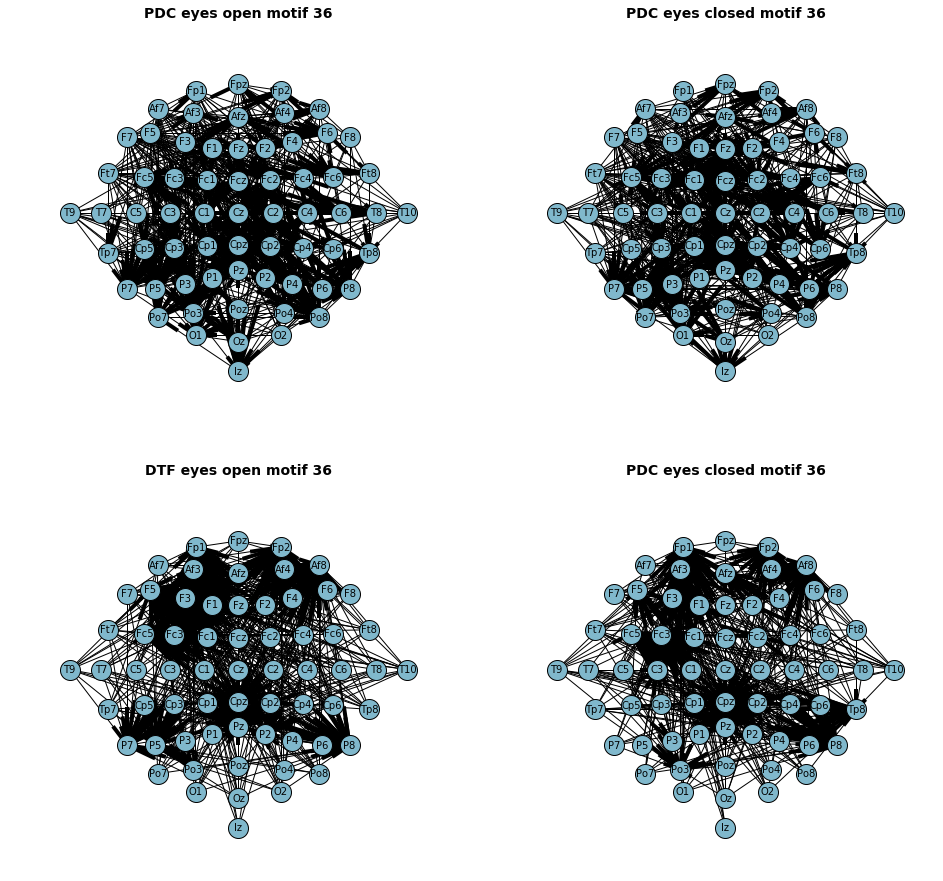

In [9]:
nc = (.5,.72,.8,1)
channel_locations = pd.read_csv('D:/DataScience/BI/HW03/channel_locations.txt', sep='\t')
pos = {n: (channel_locations['x'][n],channel_locations['y'][n]) for n in range(64)}

plt.figure(figsize=(16, 15))

plt.subplot(221)
plt.xlim(-.6,.6)
G=nx.DiGraph()
G.add_edges_from(edges_list[0])
labels = {i: olabels[i] for i in range(len(olabels))}
nx.draw(G, pos, node_size = 400, node_color = nc)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
plt.title('PDC eyes open motif 36', fontsize=14, fontweight='bold')

plt.subplot(222)
plt.xlim(-.6,.6)
G=nx.DiGraph()
G.add_edges_from(edges_list[1])
labels = {i: olabels[i] for i in range(len(olabels))}
nx.draw(G, pos, node_size = 400, node_color = nc)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
plt.title('PDC eyes closed motif 36', fontsize=14, fontweight='bold')

plt.subplot(223)
plt.xlim(-.6,.6)
G=nx.DiGraph()
G.add_edges_from(edges_list[2])
labels = {i: olabels[i] for i in range(len(olabels))}
nx.draw(G, pos, node_size = 400, node_color = nc)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
plt.title('DTF eyes open motif 36', fontsize=14, fontweight='bold')

plt.subplot(224)
plt.xlim(-.6,.6)
G=nx.DiGraph()
G.add_edges_from(edges_list[3])
labels = {i: olabels[i] for i in range(len(olabels))}
nx.draw(G, pos, node_size = 400, node_color = nc)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
plt.title('PDC eyes closed motif 36', fontsize=14, fontweight='bold')


plt.savefig('D:/DataScience/BI/HW03/4.2-motif36.png') 
#plt.savefig('D:/DataScience/BI/HW03/4.2-motif36_100.eps')
plt.show()

# 4.3. (class ‘C’) Choose a channel selected in parieto-occipital scalp region and determine the motifs which involve it.

In [10]:
from subprocess import Popen, PIPE
files = ['4-Go_pdc.txt','4-Gc_pdc.txt','4-Go_dtf.txt','4-Gc_dtf.txt']
ids = dfs[0]['ID'].tolist()
'''
for f in files:
    for i in ids:
        cmd = 'mfinder1.2 D:/DataScience/BI/HW03/mfinder/'+f+' -f D:/DataScience/BI/HW03/mfinder/'+f[:-4]+'_id'+str(i)+' -ospmem '+str(i)
        print(cmd)
        #a = Popen(cmd, shell=True)
        a = Popen(cmd, shell=True, stdout=PIPE).stdout.read()
        #print(a)
'''

"\nfor f in files:\n    for i in ids:\n        cmd = 'mfinder1.2 D:/DataScience/BI/HW03/mfinder/'+f+' -f D:/DataScience/BI/HW03/mfinder/'+f[:-4]+'_id'+str(i)+' -ospmem '+str(i)\n        print(cmd)\n        #a = Popen(cmd, shell=True)\n        a = Popen(cmd, shell=True, stdout=PIPE).stdout.read()\n        #print(a)\n"

In [11]:
channel = 56
print(olabels[channel])
Freqs = []
for f in files:
    freq = []
    for i in ids:
        file_name = 'D:/DataScience/BI/HW03/mfinder/'+f[:-4]+'_id'+str(i)+'_MEMBERS.txt'
        file = open(file_name, 'r')
        ff = ''
        for row  in file:
            ff += row
        num = re.findall(str(channel)+'\t', ff)
        print(f,i,len(num))
        freq += [len(num)]
    Freqs += [freq]

Po3
4-Go_pdc.txt 6 128
4-Go_pdc.txt 12 194
4-Go_pdc.txt 14 43
4-Go_pdc.txt 36 171
4-Go_pdc.txt 38 150
4-Go_pdc.txt 46 51
4-Go_pdc.txt 74 96
4-Go_pdc.txt 78 6
4-Go_pdc.txt 98 5
4-Go_pdc.txt 102 7
4-Go_pdc.txt 108 34
4-Go_pdc.txt 110 11
4-Go_pdc.txt 238 4
4-Gc_pdc.txt 6 98
4-Gc_pdc.txt 12 99
4-Gc_pdc.txt 14 37
4-Gc_pdc.txt 36 84
4-Gc_pdc.txt 38 112
4-Gc_pdc.txt 46 29
4-Gc_pdc.txt 74 77
4-Gc_pdc.txt 78 5
4-Gc_pdc.txt 98 5
4-Gc_pdc.txt 102 16
4-Gc_pdc.txt 108 35
4-Gc_pdc.txt 110 24
4-Gc_pdc.txt 238 2
4-Go_dtf.txt 6 28
4-Go_dtf.txt 12 94
4-Go_dtf.txt 14 2
4-Go_dtf.txt 36 63
4-Go_dtf.txt 38 111
4-Go_dtf.txt 46 25
4-Go_dtf.txt 74 62
4-Go_dtf.txt 78 1
4-Go_dtf.txt 98 2
4-Go_dtf.txt 102 14
4-Go_dtf.txt 108 31
4-Go_dtf.txt 110 12
4-Go_dtf.txt 238 3
4-Gc_dtf.txt 6 57
4-Gc_dtf.txt 12 74
4-Gc_dtf.txt 14 26
4-Gc_dtf.txt 36 66
4-Gc_dtf.txt 38 99
4-Gc_dtf.txt 46 21
4-Gc_dtf.txt 74 167
4-Gc_dtf.txt 78 17
4-Gc_dtf.txt 98 2
4-Gc_dtf.txt 102 19
4-Gc_dtf.txt 108 99
4-Gc_dtf.txt 110 43
4-Gc_dtf.txt 238 10


In [12]:
names = ['PDC eyes open', 'PDC eyes closed', 'DTF eyes open', 'DTF eyes closed']
header = [np.array(['']+names), np.array(['id']+['frequency']*4)]
d = pd.DataFrame(np.array([ids,Freqs[0],Freqs[1],Freqs[2],Freqs[3]]).T, columns = header)
d

,,PDC eyes open,PDC eyes closed,DTF eyes open,DTF eyes closed
,id,frequency,frequency,frequency,frequency
0,6,128,98,28,57
1,12,194,99,94,74
2,14,43,37,2,26
3,36,171,84,63,66
4,38,150,112,111,99
5,46,51,29,25,21
6,74,96,77,62,167
7,78,6,5,1,17
8,98,5,5,2,2


In [13]:
writer = pd.ExcelWriter('D:/DataScience/BI/HW03/4.3-Po3motifs.xlsx')
d.to_excel(writer, 'Sheet1')
writer.save()
for i in d.to_latex(index = False).split('\n'): print(i.replace('\\textbackslashn',''))

\begin{tabular}{rrrrr}
\toprule
     & PDC eyes open & PDC eyes closed & DTF eyes open & DTF eyes closed \\
  id &     frequency &       frequency &     frequency &       frequency \\
\midrule
   6 &           128 &              98 &            28 &              57 \\
  12 &           194 &              99 &            94 &              74 \\
  14 &            43 &              37 &             2 &              26 \\
  36 &           171 &              84 &            63 &              66 \\
  38 &           150 &             112 &           111 &              99 \\
  46 &            51 &              29 &            25 &              21 \\
  74 &            96 &              77 &            62 &             167 \\
  78 &             6 &               5 &             1 &              17 \\
  98 &             5 &               5 &             2 &               2 \\
 102 &             7 &              16 &            14 &              19 \\
 108 &            34 &              35 &       

# 4.4. (class ‘E’) Perform the same analysis described in task 4.1 considering 4-node motifs.

In [14]:
path = 'D:/DataScience/BI/HW03/mfinder/'
files = ['4-Go_pdc_OUT(4m).txt','4-Gc_pdc_OUT(4m).txt','4-Go_dtf_OUT(4m).txt','4-Gc_dtf_OUT(4m).txt']
dfs = []

for f in files:
    dfs += [motif_analysis(path+f)]

In [15]:
DFs = [dfs[0],dfs[1].iloc[:,1:],dfs[2].iloc[:,1:],dfs[3].iloc[:,1:]]
names = ['PDC eyes open','PDC eyes closed', 'DTF eyes open', 'DTF eyes closed']
header = [np.array(['']+[names[0]]*2+[names[1]]*2+[names[2]]*2+[names[3]]*2), np.array(['']+list(DFs[1].columns)*4)]
d = pd.DataFrame(pd.concat(DFs, axis=1).values, columns = header)
d

PDC eyes open                          PDC eyes closed  \
               Frequency Statistical Significance       Frequency   
0       14         10157               anti-motif           11884   
1       28          2947               anti-motif            2218   
2       30          3301               anti-motif            2339   
3       74         12442                    motif           11941   
4       76         21101               anti-motif           20027   
5       78         12910               anti-motif           15466   
6       90          1390               anti-motif            1063   
7       92          3817                        -            3766   
8       94          4105                    motif            2923   
9      204          1882               anti-motif            1490   
10     206          2175                        -            2947   
11     222          1495                    motif             997   
12     280          3678               anti-motif            3419   
13     282          1312               anti-motif            1372   
14     286           264               anti-motif             185   
15     328          3715                        -            3309   
16     330           201               anti-motif             190   
17     332          1811               anti-motif            1888   
18     334           551               anti-motif             560   
19     344          2544                    motif            2470   
20     346           136               anti-motif             264   
21     348          1273                    motif            1109   
22     350           582                        -             399   
23     390          1701                        -            1545   
24     392         11357                    motif            8865   
25     394          1799                    motif            1607   
26     396          3560               anti-motif            3440   
27     398          1439               anti-motif            1011   
28     404          4061               anti-motif            4912   
29     406           431               anti-motif             397   
..     ...           ...                      ...             ...   
169   6854             5                        -              11   
170   6858            37               anti-motif              67   
171   6862             4               anti-motif              21   
172   6870             6                        -              12   
173   6874            19               anti-motif              27   
174   6876            13               anti-motif              36   
175   6878            16               anti-motif              26   
176   7126            23                    motif              28   
177   7128           138                    motif             118   
178   7130            88                    motif              93   
179   7134            67                    motif              54   
180  13142           189                    motif             148   
181  13146            10               anti-motif              33   
182  13148             7               anti-motif              11   
183  13150            42                    motif              29   
184  13260             0               anti-motif               0   
185  13262             4               anti-motif               4   
186  13278            20                    motif               8   
187  14678             3                        -              12   
188  14686             0                        -               2   
189  14790             1                        -               1   
190  14798             2               anti-motif               6   
191  14810            10                    motif              20   
192  14812            16                        -              22   
193  14814            26                    motif              36   
194  1525

In [16]:
#dfs[0][dfs[0]['Statistical Significance']!='-']
writer = pd.ExcelWriter('D:/DataScience/BI/HW03/4.4-4motifs.xlsx')
d.to_excel(writer, 'Sheet1')
writer.save()